In [33]:
from hyperopt import hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.font_manager as rc
plt.rc('font', family='TENADA')

In [34]:
cow_df = pd.read_csv('cow_data.csv')
cow_df.head()

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,비고,결격사유 여부,종류,지역,Unnamed: 14
0,2021.07.23,1,서*호,48928970,암,550.0,3.0,580,360,363,목.배밑혹,1,큰소,경상남도 고성,NaN
1,2021.07.23,2,이*락,102112702,암,744.0,2.0,460,320,353,NaN,0,큰소,경상남도 고성,NaN
2,2021.07.23,3,문*종,156144852,암,1263.0,4.0,340,400,471,목이모색 상처,1,큰소,경상남도 고성,NaN
3,2021.07.23,4,문*종,136983661,암,1159.0,2.0,380,400,432,뒷다리약간절음,1,큰소,경상남도 고성,NaN
4,2021.07.23,5,이*만,138655532,암,1124.0,6.0,550,650,766,NaN,0,큰소,경상남도 고성,NaN


In [35]:
cow_df = cow_df.iloc[:,:-1]
cow_df.head(5)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,비고,결격사유 여부,종류,지역
0,2021.07.23,1,서*호,48928970,암,550.0,3.0,580,360,363,목.배밑혹,1,큰소,경상남도 고성
1,2021.07.23,2,이*락,102112702,암,744.0,2.0,460,320,353,NaN,0,큰소,경상남도 고성
2,2021.07.23,3,문*종,156144852,암,1263.0,4.0,340,400,471,목이모색 상처,1,큰소,경상남도 고성
3,2021.07.23,4,문*종,136983661,암,1159.0,2.0,380,400,432,뒷다리약간절음,1,큰소,경상남도 고성
4,2021.07.23,5,이*만,138655532,암,1124.0,6.0,550,650,766,NaN,0,큰소,경상남도 고성


In [36]:
new_cow_df = cow_df[['성별','중량','최저가','낙찰가','결격사유 여부','종류']]
new_cow_df.head()
df=new_cow_df.copy()

In [37]:
df['낙찰가']=df['낙찰가'].apply(lambda x: int(x/10) if x>2000 else int(x))

In [38]:
df.성별.replace('암',0,inplace=True)
df.성별.replace('수',1,inplace=True)
df.종류.replace('큰소',0,inplace=True)
df.종류.replace('혈통우',1,inplace=True)
df.종류.replace('일반우',2,inplace=True)

In [39]:
target_df = df.낙찰가
feature_df = df[['성별','중량','최저가','결격사유 여부','종류']]
df.corr()
target_df

0         363
1         353
2         471
3         432
4         766
         ... 
17443    1175
17444    1095
17445    1350
17446     945
17447     760
Name: 낙찰가, Length: 17448, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df,target_df,test_size=0.2,random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=0)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(13958, 5) (3490, 5)
(12562, 5) (1396, 5)


In [41]:
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test,label=y_test)

In [42]:
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
num_rounds = 400
eval_list = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-rmse:745.81946	eval-rmse:751.09098
[1]	train-rmse:671.98271	eval-rmse:676.44874
[2]	train-rmse:605.56963	eval-rmse:609.47029
[3]	train-rmse:545.83325	eval-rmse:549.11241
[4]	train-rmse:492.13418	eval-rmse:494.87540
[5]	train-rmse:443.85931	eval-rmse:446.15480
[6]	train-rmse:400.47415	eval-rmse:402.32726
[7]	train-rmse:361.50616	eval-rmse:362.90445
[8]	train-rmse:326.53462	eval-rmse:327.61352
[9]	train-rmse:295.15760	eval-rmse:295.88861
[10]	train-rmse:267.02998	eval-rmse:267.49736
[11]	train-rmse:241.83868	eval-rmse:242.07541
[12]	train-rmse:219.28863	eval-rmse:219.24211
[13]	train-rmse:199.14954	eval-rmse:198.92258
[14]	train-rmse:181.16703	eval-rmse:180.77705
[15]	train-rmse:165.17362	eval-rmse:164.67652
[16]	train-rmse:150.94571	eval-rmse:150.32600
[17]	train-rmse:138.34594	eval-rmse:137.58837
[18]	train-rmse:127.19380	eval-rmse:126.42931
[19]	train-rmse:117.37707	eval-rmse:116.57818
[20]	train-rmse:108.73303	eval-rmse:107.92856
[21]	train-rmse:101.19600	eval-rmse:100.4622

In [43]:
pred_probs = xgb_model.predict(dtest)
print(f'predict() 수행 결괏값 10개만 표시, 예측 확률 값으로 표시됨 \n{np.round(pred_probs[:10],3)}')

preds = [1 if x> 0.5 else 0 for x in pred_probs]
print(f'예측값 10개만 표시 : {preds[:10]}')

predict() 수행 결괏값 10개만 표시, 예측 확률 값으로 표시됨 
[1275.671 1098.87   266.735  816.005 1071.89   586.576  155.197  430.783
  587.972  721.257]
예측값 10개만 표시 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

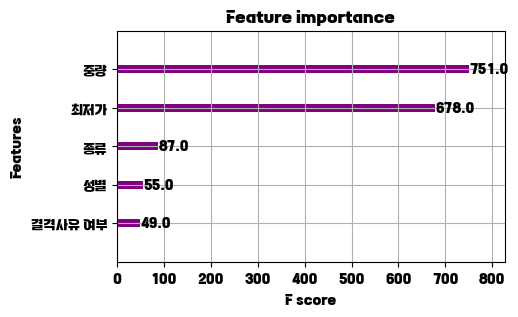

In [44]:
fig, ax = plt.subplots(figsize=(5,3))
plot_importance(xgb_model,ax=ax, color = 'purple')

In [45]:
from xgboost import XGBRegressor

xgb_wrapper = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='rmse')
xgb_wrapper.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=True)

xgb_wrapper2 = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='rmse')
xgb_wrapper2.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=True)

xgb_wrapper3 = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='rmse')
xgb_wrapper3.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=True)

y_pred = xgb_wrapper.predict(X_test)
accuracy = xgb_wrapper.score(X_test, y_test)

y_pred2 = xgb_wrapper2.predict(X_tr)
accuracy2 = xgb_wrapper2.score(X_tr, y_tr)

y_pred3 =xgb_wrapper3.predict(X_val)
accuracy3 = xgb_wrapper3.score(X_val, y_val)

print(f'[test score : {accuracy}]\n[train score : {accuracy2}]\n[val score : {accuracy3}]')

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'[RMSE : {rmse}, R2 : {r2}]')

[0]	validation_0-rmse:792.58244
[1]	validation_0-rmse:753.16644
[2]	validation_0-rmse:715.79105
[3]	validation_0-rmse:680.33553
[4]	validation_0-rmse:646.59827
[5]	validation_0-rmse:614.59505
[6]	validation_0-rmse:584.15079
[7]	validation_0-rmse:555.25303
[8]	validation_0-rmse:527.85013
[9]	validation_0-rmse:501.80294
[10]	validation_0-rmse:477.11417
[11]	validation_0-rmse:453.61337
[12]	validation_0-rmse:431.35144
[13]	validation_0-rmse:410.17375
[14]	validation_0-rmse:390.11640
[15]	validation_0-rmse:371.04497
[16]	validation_0-rmse:352.95207
[17]	validation_0-rmse:335.78195
[18]	validation_0-rmse:319.52769
[19]	validation_0-rmse:304.08688
[20]	validation_0-rmse:289.38475
[21]	validation_0-rmse:275.53456
[22]	validation_0-rmse:262.36651
[23]	validation_0-rmse:249.90059
[24]	validation_0-rmse:238.09496
[25]	validation_0-rmse:226.87855
[26]	validation_0-rmse:216.30219
[27]	validation_0-rmse:206.28680
[28]	validation_0-rmse:196.79940
[29]	validation_0-rmse:187.81630
[30]	validation_0-rm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


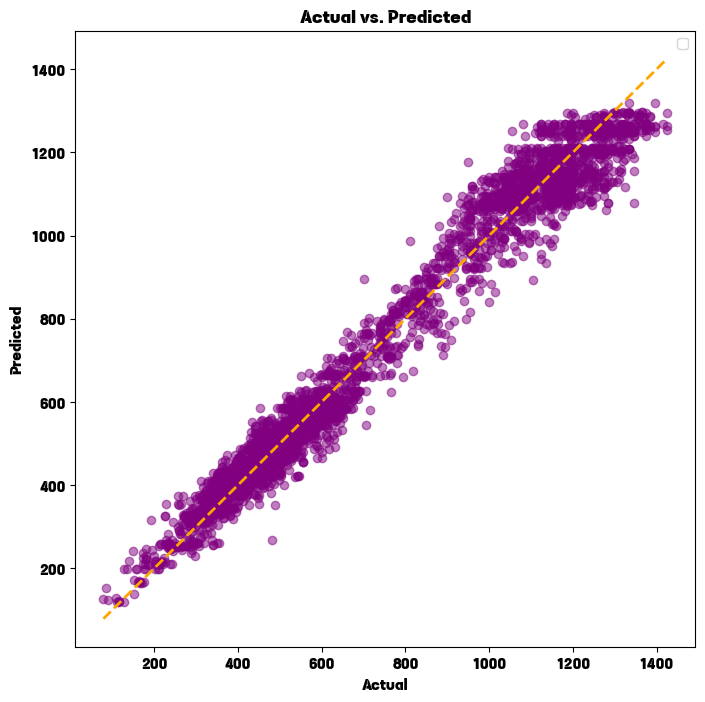

In [46]:
y_pred = xgb_wrapper.predict(X_test)
y_actual = y_test


plt.figure(figsize=(8, 8))
plt.scatter(y_actual, y_pred, alpha=0.5,color='purple')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='orange', linestyle='--', lw=2)
plt.legend()

plt.show()

In [47]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(feature_df,target_df,test_size=0.2,random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=0)

lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=.05)

In [48]:
from lightgbm import LGBMRegressor

lgbm_wrapper = LGBMRegressor(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='rmse')
lgbm_wrapper.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

[1]	valid_0's l2: 103255
[2]	valid_0's l2: 93658.8
[3]	valid_0's l2: 84964.1
[4]	valid_0's l2: 77121.5
[5]	valid_0's l2: 70045.6
[6]	valid_0's l2: 63669.5
[7]	valid_0's l2: 57885.3
[8]	valid_0's l2: 52667
[9]	valid_0's l2: 47958.4
[10]	valid_0's l2: 43696.7
[11]	valid_0's l2: 39855.7
[12]	valid_0's l2: 36377.3
[13]	valid_0's l2: 33223.3
[14]	valid_0's l2: 30379.9
[15]	valid_0's l2: 27826.7
[16]	valid_0's l2: 25498.6
[17]	valid_0's l2: 23400.1
[18]	valid_0's l2: 21502.4
[19]	valid_0's l2: 19783.6
[20]	valid_0's l2: 18242.8
[21]	valid_0's l2: 16841.2
[22]	valid_0's l2: 15575.7
[23]	valid_0's l2: 14439.6
[24]	valid_0's l2: 13401.5
[25]	valid_0's l2: 12464.9
[26]	valid_0's l2: 11620.1
[27]	valid_0's l2: 10855.9
[28]	valid_0's l2: 10159.8
[29]	valid_0's l2: 9527.73
[30]	valid_0's l2: 8964.73
[31]	valid_0's l2: 8449.73
[32]	valid_0's l2: 7985.08
[33]	valid_0's l2: 7573.09
[34]	valid_0's l2: 7189.14
[35]	valid_0's l2: 6850.18
[36]	valid_0's l2: 6544.5
[37]	valid_0's l2: 6262.87
[38]	valid_0's

LGBMRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=3,
              n_estimators=400)